In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA


dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')


In [2]:
dfTest['Fare'].isnull().sum()
dfTest[dfTest['Fare'].isna()]
#idx = dfTest[dfTest['Fare'] == np.NAN].index
#dfTest.loc[idx]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [3]:
display(dfTrain.head(20))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print(dfTrain.isna().sum())
dfTrain.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### DATA CLEANING

In [5]:
# Passenger Id and Ticket don't give us any insight so we drop them

dfTrain.drop(["PassengerId","Ticket"], axis=1, inplace=True)
dfTest.drop(["PassengerId","Ticket"], axis=1, inplace=True)

In [6]:
# filling Age with median (not mean because right skewed)

dfTrain.Age = dfTrain.Age.fillna(dfTrain.Age.median())
dfTest.Age = dfTest.Age.fillna(dfTrain.Age.median())

dfTrain.loc[dfTrain['Embarked'].isnull(), 'Embarked'] = 'S'

# Use cabin nr to get Deck info
dfTrain['Deck'] = dfTrain['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
dfTest['Deck'] = dfTest['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
# in our Train Data there is a row with T as Deck which is no Deck on Titanic
# with looking at the fare it seems that this should be an 'A'
idx = dfTrain[dfTrain['Deck'] == 'T'].index
dfTrain.loc[idx, 'Deck'] = 'A'

dfTrain.drop(columns=['Cabin'], inplace=True)
dfTest.drop(columns=['Cabin'], inplace=True)


In [7]:
# create column for total relatives of a person and column for "alone or not alone"
dataset = [dfTrain, dfTest]

for d in dataset:
    d['relatives'] = d['SibSp'] + d['Parch']
    d.loc[d['relatives'] > 0, 'not_alone'] = 0
    d.loc[d['relatives'] == 0, 'not_alone'] = 1
    d['not_alone'] = d['not_alone'].astype(int)
display(dfTrain['not_alone'].value_counts())
display(dfTrain['relatives'].value_counts())

1    537
0    354
Name: not_alone, dtype: int64

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

In [8]:
# create a column for the title to see if there is some usefull information

data = [dfTrain, dfTest]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    #replace "Mlle" (Mademoiselle) with "Miss"
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    # replace "Mme" (Madame) with "Mrs"
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

dfTrain.drop(columns=['Name'], inplace=True)
dfTest.drop(columns=['Name'], inplace=True)

In [9]:
# Eliminate outliers in age by creating age groups 

data = [dfTrain, dfTest]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [10]:
location = {"S": 0, "C": 2, "Q": 1}
data = [dfTrain, dfTest]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(location)

In [11]:
dfTrain['Embarked'].unique()

array([0, 2, 1])

### VISUALIZATION

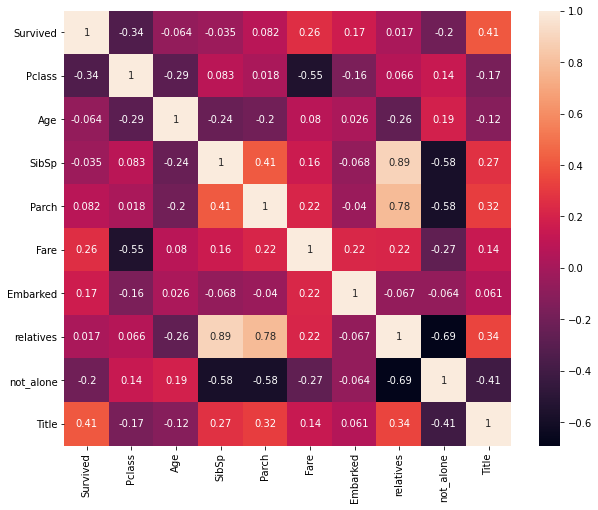

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(dfTrain.corr(), annot=True);

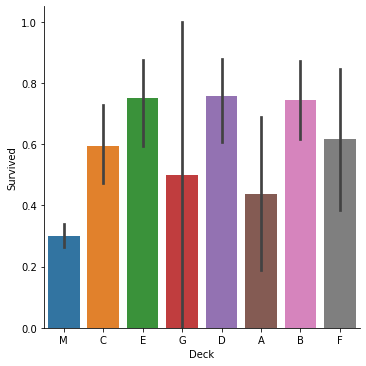

In [13]:
sns.catplot(data=dfTrain, x='Deck', y='Survived', kind='bar');

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


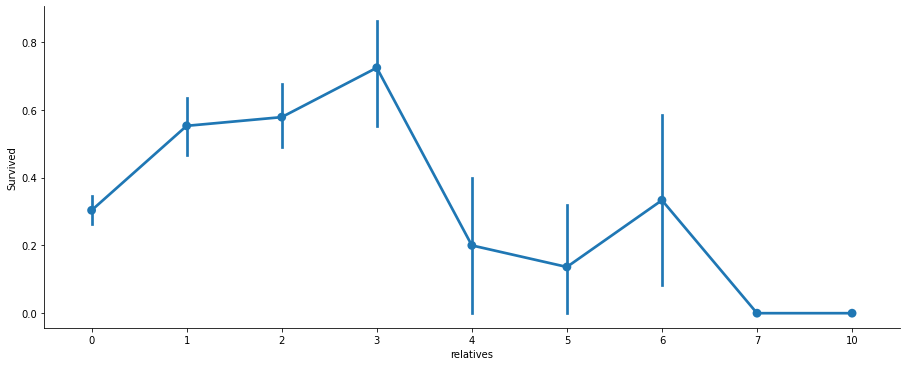

In [14]:
sns.factorplot(x='relatives', y='Survived', data=dfTrain, aspect = 2.5);

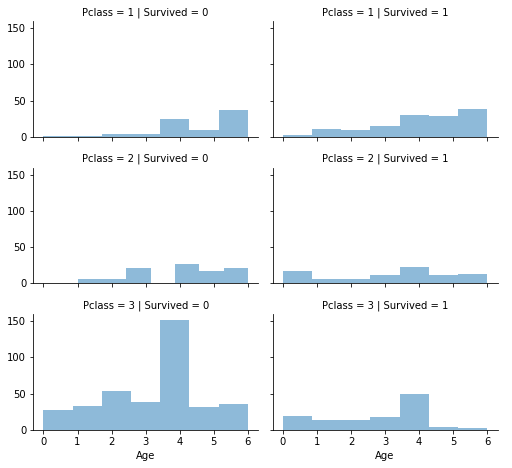

In [15]:
grid = sns.FacetGrid(dfTrain, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=7)
grid.add_legend();

In [16]:
import plotly.express as px

fig = px.scatter_3d(dfTrain, z='Age', x='Survived', y='Fare',
              color='Sex')
fig.show()


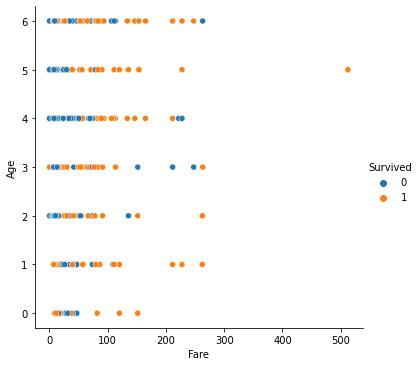

In [17]:
sns.relplot(data=dfTrain, y='Age', hue='Survived', x='Fare',kind='scatter')

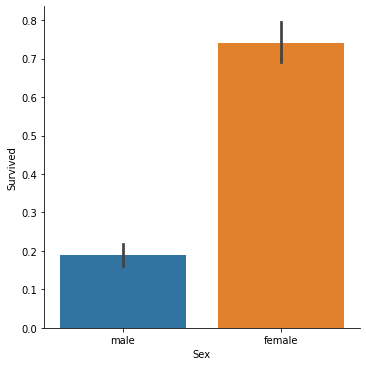

In [18]:
sns.catplot(data=dfTrain, y='Survived', x='Sex', kind='bar')

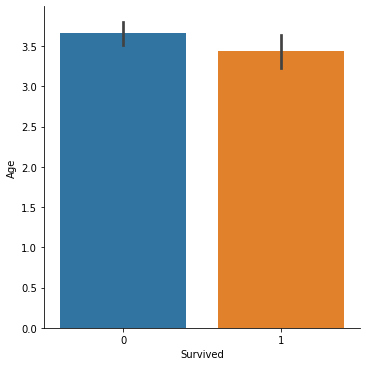

In [19]:
sns.catplot(data=dfTrain, y='Age', x='Survived', kind='bar')

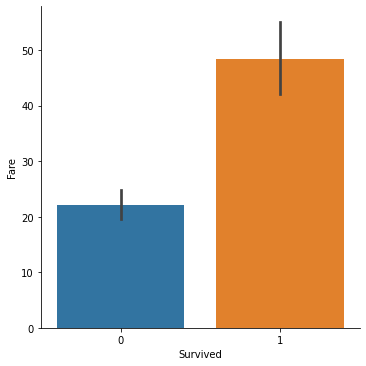

In [20]:
sns.catplot(data=dfTrain, y='Fare', x='Survived', kind='bar');

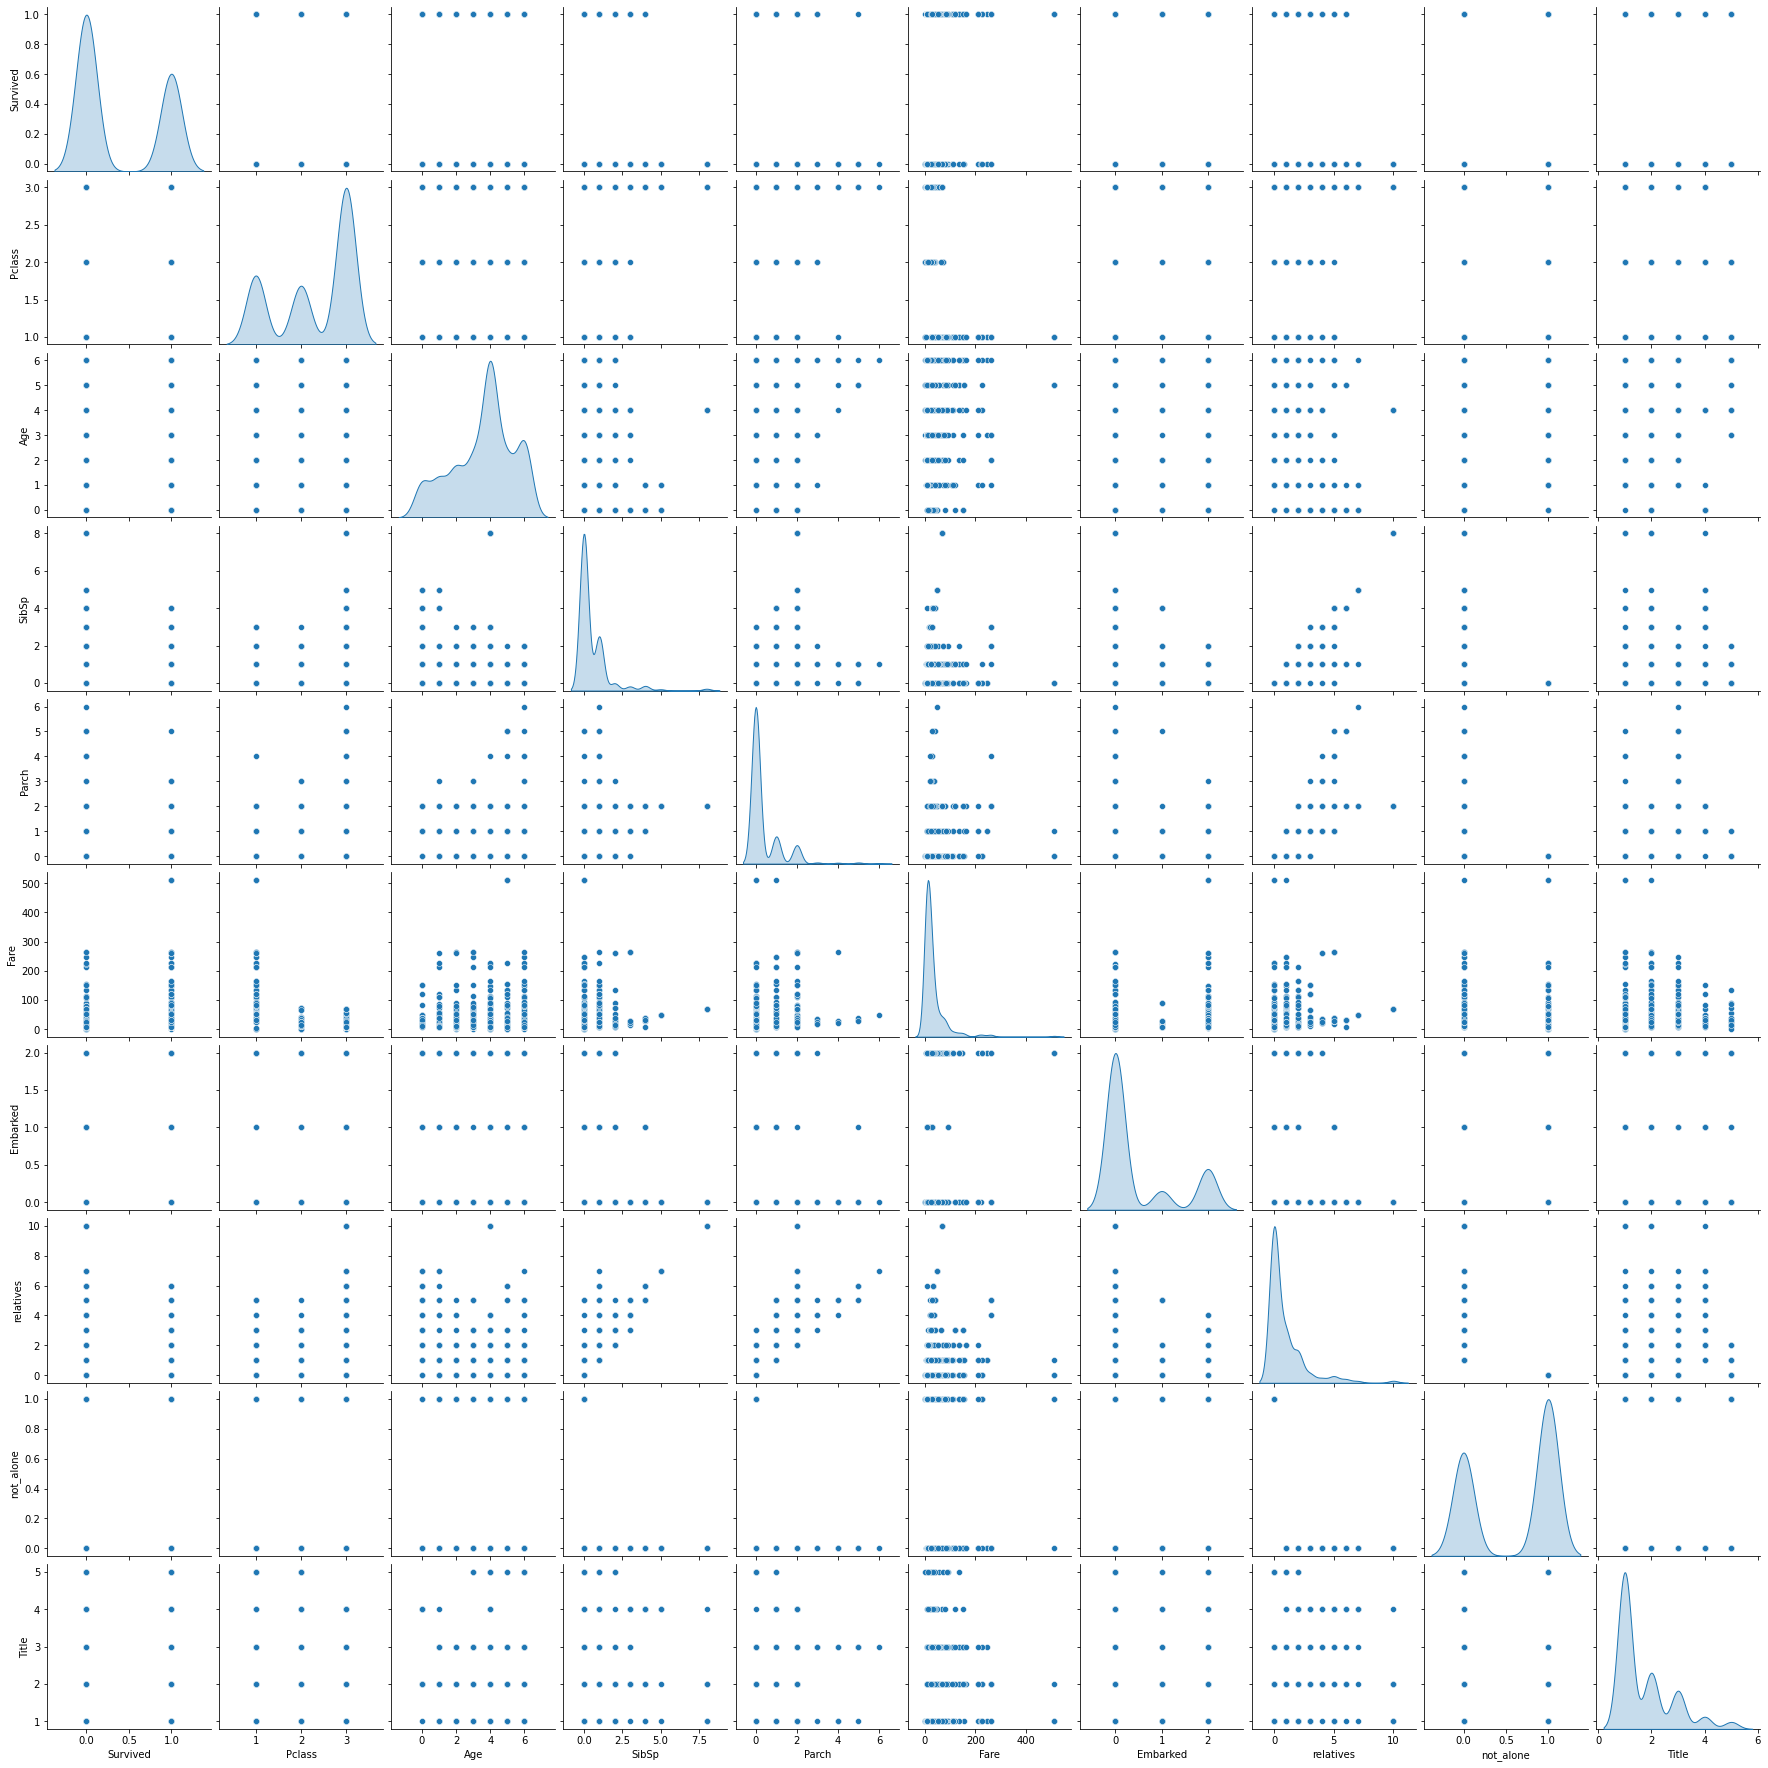

In [21]:
sns.pairplot(dfTrain, diag_kind='kde');

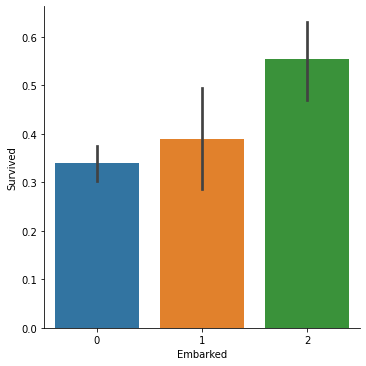

In [22]:
sns.catplot(data=dfTrain, x='Embarked', y='Survived', kind='bar');

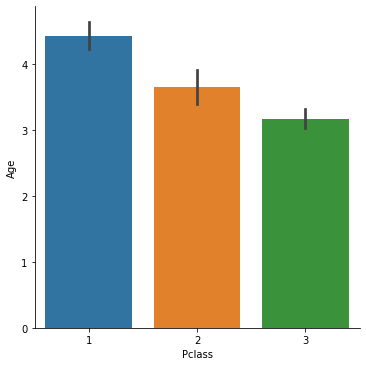

In [23]:
sns.catplot(data=dfTrain, x='Pclass', y='Age', kind='bar');

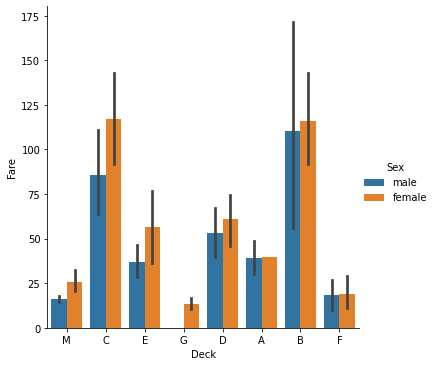

In [24]:
sns.catplot(data=dfTrain, x='Deck', y='Fare', hue='Sex', kind='bar');

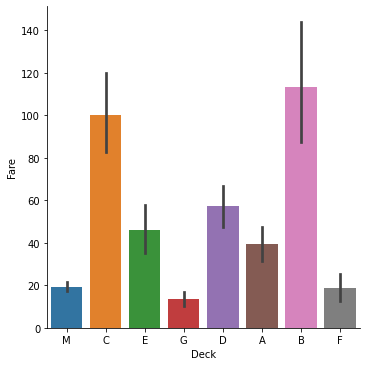

In [25]:
sns.catplot(data=dfTrain, x='Deck', y='Fare', kind='bar');

In [26]:
dfTrain.groupby(['Deck', 'Sex'])['Survived'].value_counts()#.plot(kind='bar')

Deck  Sex     Survived
A     female  1             1
      male    0             9
              1             6
B     female  1            27
      male    0            12
              1             8
C     female  1            24
              0             3
      male    0            21
              1            11
D     female  1            18
      male    0             8
              1             7
E     female  1            14
              0             1
      male    1            10
              0             7
F     female  1             5
      male    0             5
              1             3
G     female  0             2
              1             2
M     female  1           142
              0            75
      male    0           406
              1            64
Name: Survived, dtype: int64

In [27]:
dfTrain.groupby(['Embarked', 'Sex'])['Survived'].value_counts()#.plot(kind='bar')

Embarked  Sex     Survived
0         female  1           142
                  0            63
          male    0           364
                  1            77
1         female  1            27
                  0             9
          male    0            38
                  1             3
2         female  1            64
                  0             9
          male    0            66
                  1            29
Name: Survived, dtype: int64

In [28]:
dfTrain.groupby(['Embarked', 'Sex'])['Age'].mean()#.plot(kind='bar')

Embarked  Sex   
0         female    3.351220
          male      3.641723
1         female    3.527778
          male      3.731707
2         female    3.369863
          male      3.884211
Name: Age, dtype: float64

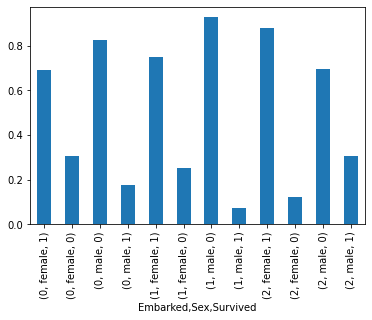

In [29]:
dfTrain.groupby(['Embarked', 'Sex'])['Survived'].value_counts(normalize=True).plot(kind='bar');

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
scaler = StandardScaler()
onehot = OneHotEncoder()
labelit = LabelEncoder()
minmax = MinMaxScaler()


#Train data

# Label encoding

#dfTrain.Embarked = labelit.fit_transform(dfTrain['Embarked'])
dfTrain.Sex = labelit.fit_transform(dfTrain['Sex'])
dfTrain.Deck = labelit.fit_transform(dfTrain['Deck'])

#Scale variation

#dfTrain.Age = scaler.fit_transform(dfTrain[['Age']])
dfTrain.Fare = scaler.fit_transform(dfTrain[['Fare']])


# mixMax variation - 

#dfTrain.Age = minmax.fit_transform(dfTrain[['Age']])
#dfTrain.Fare = minmax.fit_transform(dfTrain[['Fare']])


# Test Data

# Scale variation

#dfTest.Age = scaler.fit_transform(dfTest[['Age']])
dfTest.Fare = scaler.fit_transform(dfTest[['Fare']])

#minmax variation

# dfTest.Age = minmax.fit_transform(dfTest[['Age']])
# dfTest.Fare = minmax.fit_transform(dfTest[['Fare']])


#dfTest.Embarked = labelit.fit_transform(dfTest['Embarked'])
dfTest.Sex = labelit.fit_transform(dfTest['Sex'])
dfTest.Deck = labelit.fit_transform(dfTest['Deck'])

In [31]:
dfTrain['Fare'].isna().sum()

0

In [32]:
dfTrain.to_csv('Train_clean.csv')
dfTest.to_csv('Test_clean.csv')

In [33]:
da = pd.read_csv('Train_clean.csv')#.isna().sum()

In [34]:
da['Embarked']

0      0
1      2
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    2
890    1
Name: Embarked, Length: 891, dtype: int64